## 1. Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline


## 2. Load the dataset

In [3]:
url = "https://raw.githubusercontent.com/mohamedilliyas/ml-internship-tasks/refs/heads/main/Task2_Customer_Segmentation/Mall_Customers.csv"
df = pd.read_csv(url)

## 3. exploration

In [5]:
print("Dataset shape:", df.shape)

Dataset shape: (200, 5)


In [6]:
print("\nFirst 5 rows:")


First 5 rows:


In [7]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [8]:
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [9]:
print("\nMissing values:")
print(df.isna().sum())


Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [10]:
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


## 4. Select features for clustering
Most common and expected for this task: Annual Income and Spending Score

In [11]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

## 5. Visualize data before clustering

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Laptop\AppData\Local\Temp\ipykernel_636\250660803.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.savefig("D:\ml-internship-tasks\Task2_Customer_Segmentation\Outputs\Customers_before_clustering.png")


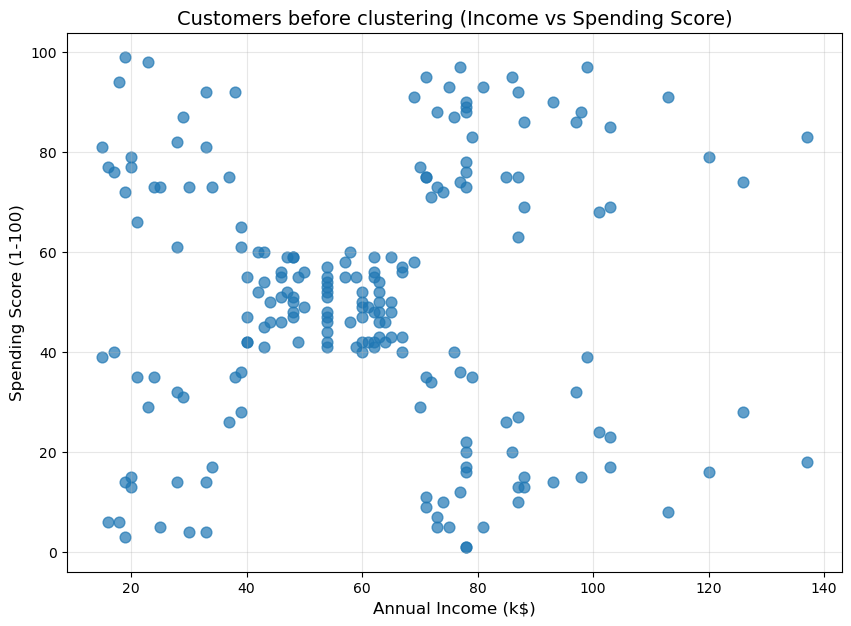

In [24]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], s=60, alpha=0.7)
plt.title('Customers before clustering (Income vs Spending Score)', fontsize=14)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig("D:\ml-internship-tasks\Task2_Customer_Segmentation\Outputs\Customers_before_clustering.png")
plt.show()

## 6. Feature Scaling

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 7. Elbow Method – find optimal number of clusters

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Laptop\AppData\Local\Temp\ipykernel_636\70125970.py:17: SyntaxWarning: invalid escape sequence '\m'
  plt.savefig("D:\ml-internship-tasks\Task2_Customer_Segmentation\Outputs\Elbow_Method_for_Optimal_k.png")
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known t

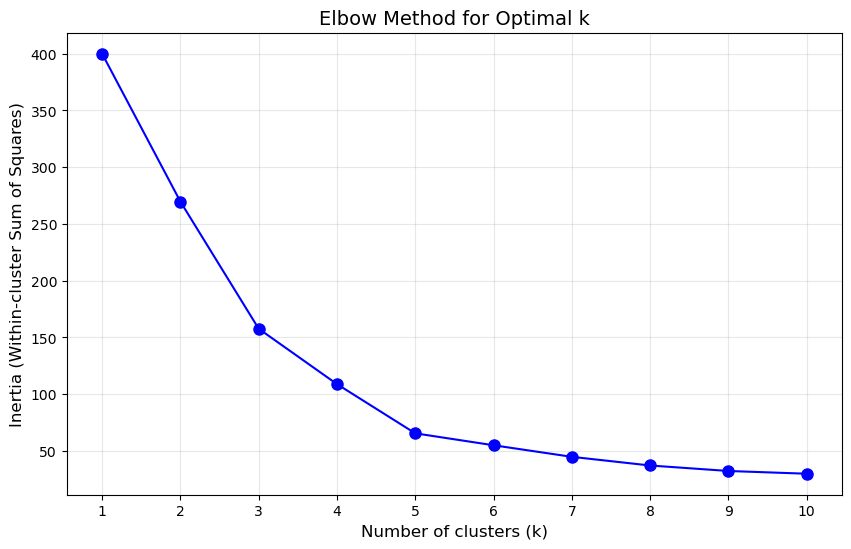

In [25]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.xlabel('Number of clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-cluster Sum of Squares)', fontsize=12)
plt.xticks(K)
plt.grid(True, alpha=0.3)
plt.savefig("D:\ml-internship-tasks\Task2_Customer_Segmentation\Outputs\Elbow_Method_for_Optimal_k.png")
plt.show()

## 8. Silhouette Score for better decision

<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Laptop\AppData\Local\Temp\ipykernel_636\315600398.py:14: SyntaxWarning: invalid escape sequence '\m'
  plt.savefig("D:\ml-internship-tasks\Task2_Customer_Segmentation\Outputs\Silhouette_Score_for_different_k.png")
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is 

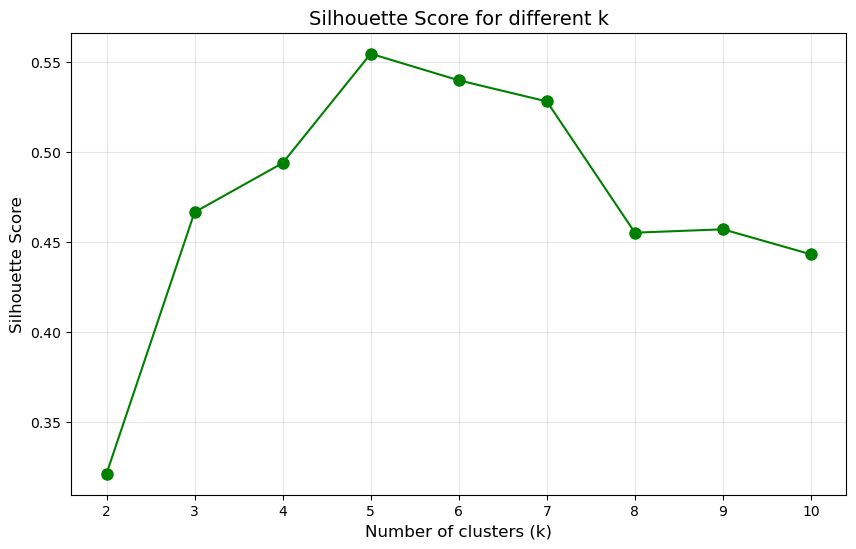

In [26]:
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2,11), sil_scores, 'go-', markersize=8)
plt.title('Silhouette Score for different k', fontsize=14)
plt.xlabel('Number of clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig("D:\ml-internship-tasks\Task2_Customer_Segmentation\Outputs\Silhouette_Score_for_different_k.png")
plt.show()

## 9. Choose optimal k

In [19]:
optimal_k = 5

## 10. Final model

In [20]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
# Add cluster labels to original dataframe
df['Cluster'] = clusters

## 11. Visualize the clusters

<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Laptop\AppData\Local\Temp\ipykernel_636\1047772176.py:20: SyntaxWarning: invalid escape sequence '\m'
  plt.savefig("D:\ml-internship-tasks\Task2_Customer_Segmentation\Outputs\Mall_Customer_cluster5.png")


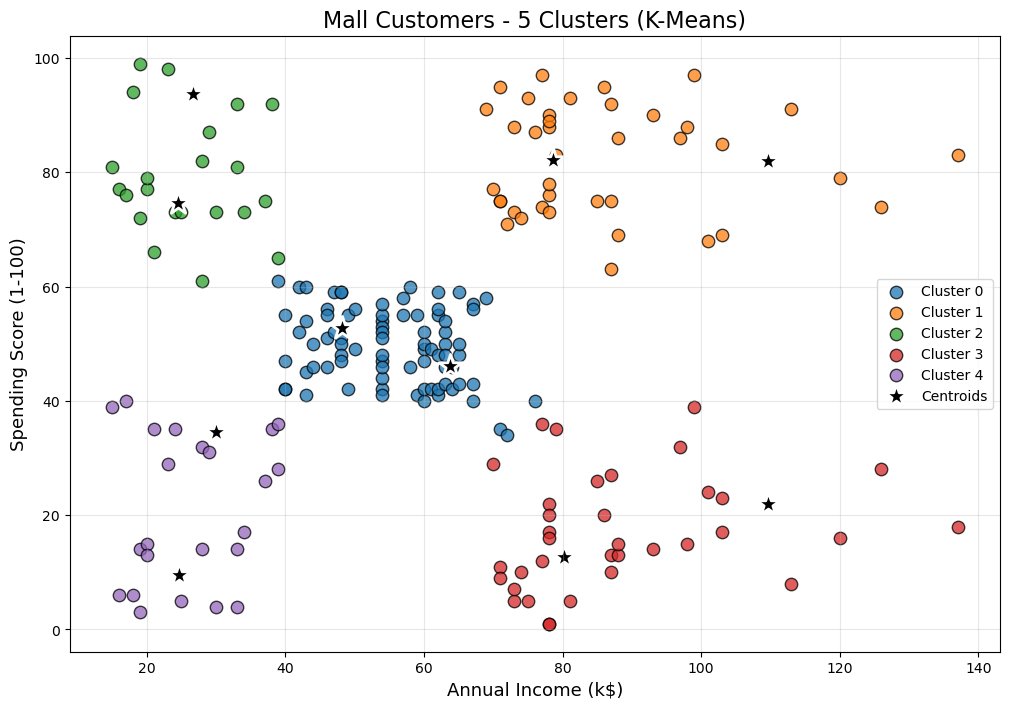

In [27]:
plt.figure(figsize=(12, 8))

# Different colors for each cluster
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i in range(optimal_k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1],
                s=80, c=colors[i], label=f'Cluster {i}', alpha=0.75, edgecolors='black')

# Plot centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='*', 
            label='Centroids', edgecolors='white', linewidths=2)

plt.title(f'Mall Customers - {optimal_k} Clusters (K-Means)', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=13)
plt.ylabel('Spending Score (1-100)', fontsize=13)
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("D:\ml-internship-tasks\Task2_Customer_Segmentation\Outputs\Mall_Customer_cluster5.png")
plt.show()

## 12. Bonus - Analyze clusters

In [23]:
print("\nCluster Analysis:")
cluster_summary = df.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max'],
    'CustomerID': 'count'
}).round(1)

print(cluster_summary)


Cluster Analysis:
        Annual Income (k$)          Spending Score (1-100)         CustomerID
                      mean min  max                   mean min max      count
Cluster                                                                      
0                     55.3  39   76                   49.5  34  61         81
1                     86.5  69  137                   82.1  63  97         39
2                     25.7  15   39                   79.4  61  99         22
3                     88.2  70  137                   17.1   1  39         35
4                     26.3  15   39                   20.9   3  40         23


# Bonus 1: Trying DBSCAN clustering

<>:51: SyntaxWarning: invalid escape sequence '\m'
<>:51: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Laptop\AppData\Local\Temp\ipykernel_636\3545331227.py:51: SyntaxWarning: invalid escape sequence '\m'
  plt.savefig("D:\ml-internship-tasks\Task2_Customer_Segmentation\Outputs\DBSCAN_Clustering.png")


DBSCAN found 2 clusters
Number of noise points (outliers): 8


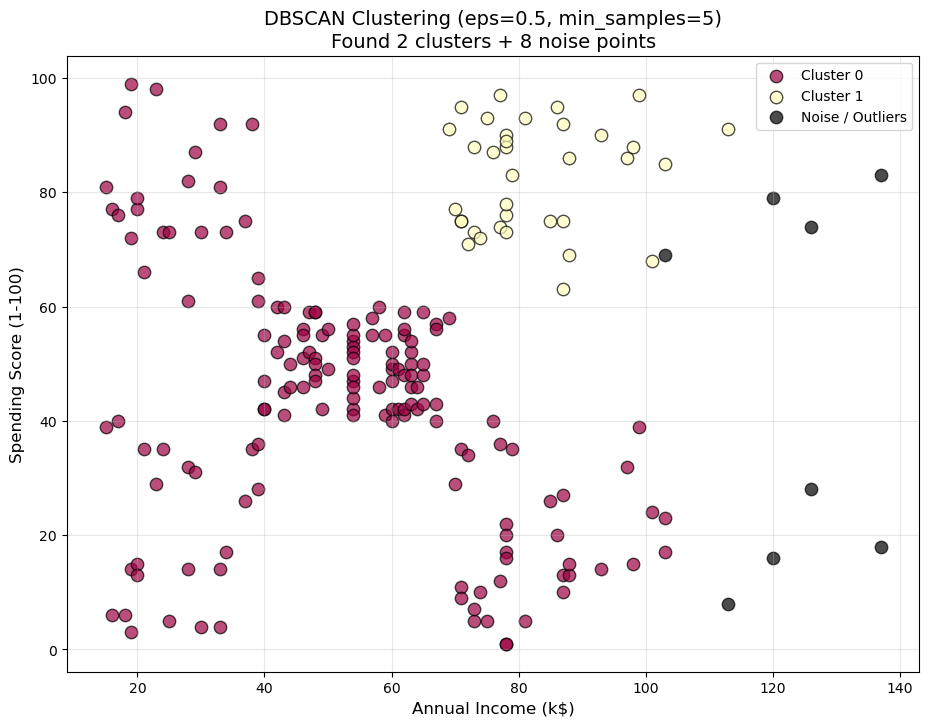

In [29]:
from sklearn.cluster import DBSCAN
import numpy as np

# We use the same scaled features as before
# X_scaled = Annual Income + Spending Score (already scaled)
# Try DBSCAN
# eps = maximum distance between two samples to be considered neighbors
# min_samples = minimum number of points to form a dense region
db = DBSCAN(eps=0.5, min_samples=5)
db_labels = db.fit_predict(X_scaled)

# Number of clusters (excluding noise points labeled as -1)
n_clusters_db = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise = list(db_labels).count(-1)

print(f"DBSCAN found {n_clusters_db} clusters")
print(f"Number of noise points (outliers): {n_noise}")

# ─── Visualize DBSCAN result ────────────────────────────────
plt.figure(figsize=(11, 8))

unique_labels = set(db_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]
        label_name = "Noise / Outliers"
    else:
        label_name = f"Cluster {k}"

    class_member_mask = (db_labels == k)
    
    plt.scatter(
        X[class_member_mask, 0],
        X[class_member_mask, 1],
        s=80, 
        c=[col],
        label=label_name,
        alpha=0.7,
        edgecolors='black'
    )

plt.title(f"DBSCAN Clustering (eps={db.eps}, min_samples={db.min_samples})\n"
          f"Found {n_clusters_db} clusters + {n_noise} noise points", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("D:\ml-internship-tasks\Task2_Customer_Segmentation\Outputs\DBSCAN_Clustering.png")
plt.show()

# Bonus 2: Gender and Age distribution per cluster

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:50: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:50: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Laptop\AppData\Local\Temp\ipykernel_636\845975051.py:21: SyntaxWarning: invalid escape sequence '\m'
  plt.savefig("D:\ml-internship-tasks\Task2_Customer_Segmentation\Outputs\Gender_Distribution_per_Cluster.png")
C:\Users\Laptop\AppData\Local\Temp\ipykernel_636\845975051.py:50: SyntaxWarning: invalid escape sequence '\m'
  plt.savefig("D:\ml-internship-tasks\Task2_Customer_Segmentation\Age_Distribution_per_Cluster.png")


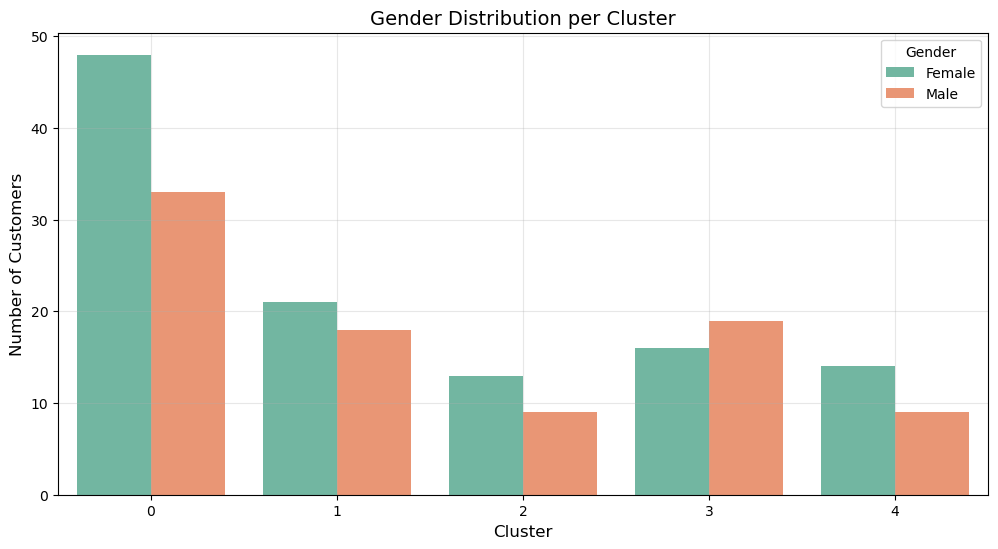

C:\Users\Laptop\AppData\Local\Temp\ipykernel_636\845975051.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Laptop\AppData\Local\Temp\ipykernel_636\845975051.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


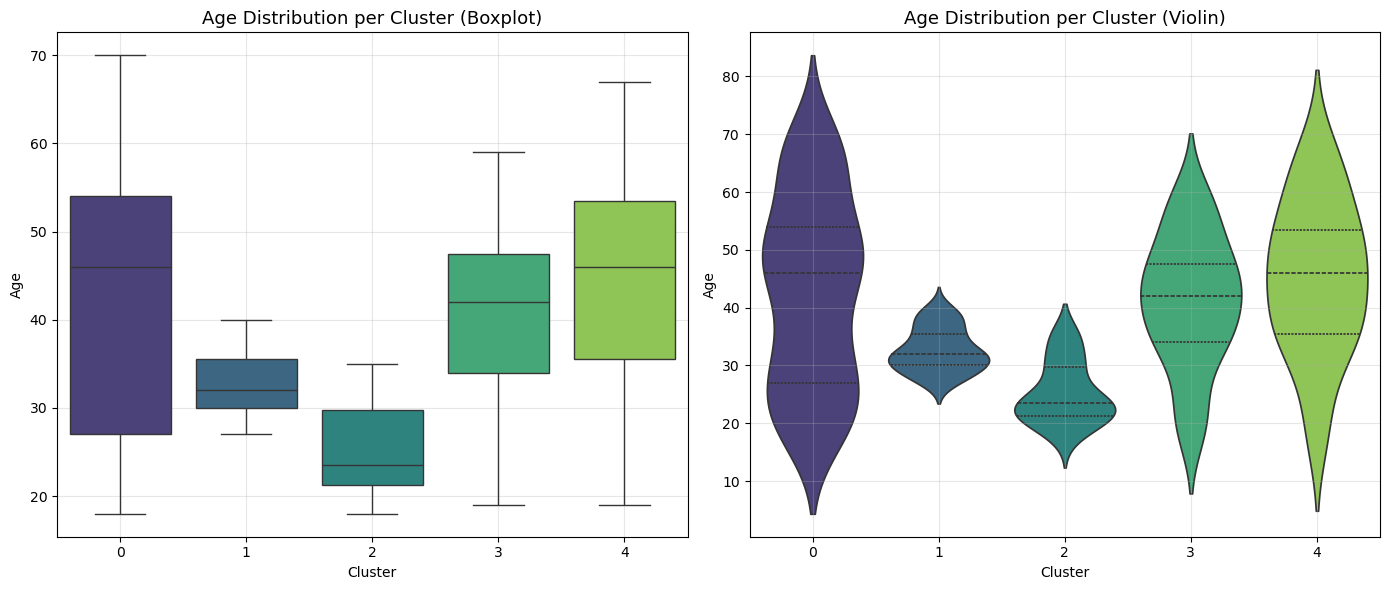


=== Cluster Summary with Demographics ===
         Age Mean  Age Median  Age Min  Age Max  Income Mean  Spending Mean  \
Cluster                                                                       
0            42.7        46.0       18       70         55.3           49.5   
1            32.7        32.0       27       40         86.5           82.1   
2            25.3        23.5       18       35         25.7           79.4   
3            41.1        42.0       19       59         88.2           17.1   
4            45.2        46.0       19       67         26.3           20.9   

         Count Most Common Gender  
Cluster                            
0           81             Female  
1           39             Female  
2           22             Female  
3           35               Male  
4           23             Female  


In [33]:
import seaborn as sns

# Make sure we have the Cluster column from K-Means
# df['Cluster'] should already exist

# ─── 1. Gender distribution per cluster ───────────────
plt.figure(figsize=(12, 6))

sns.countplot(
    data=df,
    x='Cluster',
    hue='Gender',
    palette='Set2'
)

plt.title("Gender Distribution per Cluster", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.legend(title="Gender")
plt.grid(alpha=0.3)
plt.savefig("D:\ml-internship-tasks\Task2_Customer_Segmentation\Outputs\Gender_Distribution_per_Cluster.png")
plt.show()

# ─── 2. Age distribution per cluster (boxplot + violin) ───
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(
    data=df,
    x='Cluster',
    y='Age',
    palette='viridis'
)
plt.title("Age Distribution per Cluster (Boxplot)", fontsize=13)
plt.grid(alpha=0.3)
#plt.savefig("D:\ml-internship-tasks\Task2_Customer_Segmentation\Age_Distribution_per_Cluster_Boxplot.png")

# Violin plot (shows density)
plt.subplot(1, 2, 2)
sns.violinplot(
    data=df,
    x='Cluster',
    y='Age',
    palette='viridis',
    inner="quartile"
)
plt.title("Age Distribution per Cluster (Violin)", fontsize=13)
plt.grid(alpha=0.3)
plt.savefig("D:\ml-internship-tasks\Task2_Customer_Segmentation\Age_Distribution_per_Cluster.png")

plt.tight_layout()
plt.show()

# ─── 3. Summary table ───────────────────────────────────
print("\n=== Cluster Summary with Demographics ===")

cluster_demo = df.groupby('Cluster').agg({
    'Age': ['mean', 'median', 'min', 'max'],
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count',
    'Gender': lambda x: x.value_counts().index[0]   # most common gender
}).round(1)

# Rename columns for clarity
cluster_demo.columns = [
    'Age Mean', 'Age Median', 'Age Min', 'Age Max',
    'Income Mean', 'Spending Mean', 'Count', 'Most Common Gender'
]

print(cluster_demo)